In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn
from torch.utils.data import random_split
import torch.nn.functional as F
#import torch.optim as optim

import pandas as pd
import seaborn as sns


In [2]:
### Set seed
seed = 3
torch.manual_seed(seed)

# Set Xavier Scaling
xavier_scale = 1

In [3]:
from pathlib import Path
import os

#create trial_name
trial_name = "sd" + str(seed) + '_xs' + str(xavier_scale)
plot_dir = f"./trials/{trial_name}/plots"

checkpoint_filename = f"./trials/{trial_name}/checkpoints/bruh.txt"
os.makedirs(os.path.dirname(checkpoint_filename), exist_ok=True)

with open(checkpoint_filename, "w") as f:
    f.write("Bruh")


In [4]:
# %load NNs.py

In [5]:
transform = transforms.Compose(
    [#transforms.ToTensor(),
     #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
     transforms.ToTensor(),
     ])

batch_size = 128


trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                       download=True, transform=transform)

testvalset = torchvision.datasets.CIFAR10(root='./data/', train=False,
                                          download=False, transform=transform)

testset, valset = random_split(testvalset, [0.5, 0.5])

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

print(len(trainset))
print(len(testset))
print(len(valset))

# print(len(dataset))

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')




Files already downloaded and verified
50000
5000
5000


In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)


cuda:0


In [7]:

from NNs import init_weights, CNN

model = CNN().to(device)
model.apply(lambda module: init_weights(m=module, xavier_scale=xavier_scale))

tensor(-0.0230)
Parameter containing:
tensor([[[[ 0.0520, -0.0485, -0.0568],
          [-0.0685, -0.0058, -0.0034],
          [ 0.0814, -0.0533,  0.0559]],

         [[-0.0414, -0.0242,  0.0207],
          [-0.0056, -0.0310, -0.0282],
          [ 0.0326, -0.0175, -0.0231]],

         [[-0.0215,  0.0708, -0.0796],
          [ 0.0245,  0.0316,  0.0529],
          [ 0.0740,  0.0751,  0.0202]]],


        [[[ 0.0140,  0.0697, -0.0159],
          [ 0.0122,  0.0037,  0.0066],
          [-0.0665, -0.0645, -0.0306]],

         [[ 0.0157,  0.0491, -0.0458],
          [ 0.0518, -0.0614, -0.0604],
          [-0.0286,  0.0451, -0.0723]],

         [[-0.0203, -0.0748,  0.0336],
          [-0.0178, -0.0328, -0.0083],
          [ 0.0589,  0.0740,  0.0670]]],


        [[[ 0.0531, -0.0382,  0.0735],
          [-0.0529, -0.0263, -0.0523],
          [ 0.0751,  0.0477,  0.0106]],

         [[ 0.0198,  0.0672, -0.0214],
          [-0.0420,  0.0518,  0.0531],
          [ 0.0659, -0.0716, -0.0220]],

      

CNN(
  (InputDropout): Dropout(p=0.2, inplace=False)
  (ConvBlock1): Sequential(
    (0): Conv2d(3, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (ConvBlock2): Sequential(
    (0): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (PoolBlock1): Sequential(
    (0): Conv2d(96, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
  )
  (ConvBlock3): Sequential(
    (0): Conv2d(96, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (ConvBlock4): Sequential(
    (0): Conv2d(192, 192, kerne

In [8]:
#print_output_shape = False


#data_iter = iter(trainset)

#for i in range(3):
    #(data, label) = next(data_iter)
#im = data
#data = data.unsqueeze(0)
#input_shape = data.shape

#print(data.shape)

#if (print_output_shape):
    #print(data.shape)
    #print(model(data))
    #print('\n')


#from torchsummary import summary
#_ = summary(model, ( 3, 32, 32))

##print(model(data).shape)

In [9]:
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05, weight_decay=0.001)
scheduler = StepLR(optimizer, step_size=1, gamma=0.97)


In [10]:
#epoch_number = 75
#epoch_number = 130
epoch_number = 200

from Helper_Functions import calculate_valloss, calculate_accuracy, save_checkpoint


epoch_list = []
loss_list = []

val_accuracy_list = []
val_loss_list = []
epoch_range_list = list(range(epoch_number))


for epoch in range(epoch_number):  # loop over the dataset multiple times
    n_batches = 0
    running_loss = 0.0


    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
       
        outputs = model(inputs)
        #print(outputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        n_batches += 1


    epoch_list.append(epoch+1)
    loss_list.append(running_loss/n_batches)
    
    print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / n_batches:.7f}')
    running_loss = 0.0

    val_accuracy_list.append(calculate_accuracy(model, valloader, device))
    val_loss_list.append(calculate_valloss(model, criterion, valloader, device))


    if (epoch+1) % 5 == 0:
        checkpoint_filename = f"trials/{trial_name}/checkpoints/checkpoint_{epoch + 1}.path"
        #os.makedirs(os.path.dirname(checkpoint_filename), exist_ok=True)
        #save_checkpoint(model, optimizer, epoch+1, loss.item(), filename=f"checkpoints2/checkpoint_{epoch + 1}.pth")
        save_checkpoint(model, optimizer, epoch+1, loss.item(), filename=checkpoint_filename)
        

    scheduler.step()


print('Finished Training')

KeyboardInterrupt: 

Text(0.5, 1.0, 'Training Loss')

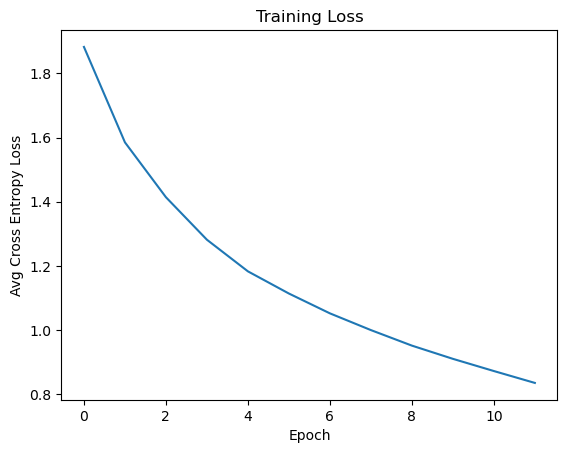

In [ ]:
dic = {'losses':loss_list, 'epoch':epoch_list}
df = pd.DataFrame(data=dic)
#df = df[150:]

p = sns.lineplot(data=df, x=df.index, y='losses')
p.set_xlabel("Epoch")
p.set_ylabel("Avg Cross Entropy Loss")
p.set_title("Training Loss")



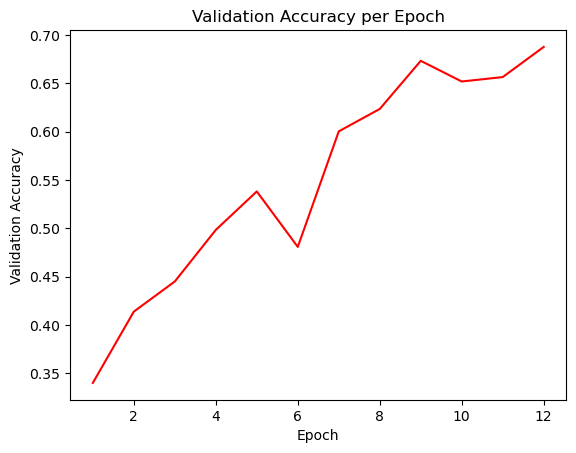

In [ ]:
dic2 = {'Validation Accuracy':val_accuracy_list, 'Epoch':epoch_list}
df2 = pd.DataFrame(data=dic2)

p2 = sns.lineplot(data=df2, x='Epoch', y='Validation Accuracy', color='red')
p2.set_title('Validation Accuracy per Epoch')

plot_title = 'val_acc_per_epoch'

plot_filename = f"trials/{trial_name}/plots/{plot_title}.png"
os.makedirs(os.path.dirname(plot_filename), exist_ok=True)

p2.figure.savefig(plot_filename)


[1.8426731824874878, 1.6496607065200806, 1.6274763345718384, 1.483036994934082, 1.3067044019699097, 1.5256789922714233, 1.1423739194869995, 1.084957480430603, 0.9681593775749207, 1.00832200050354, 0.9754490256309509, 0.8891521692276001]


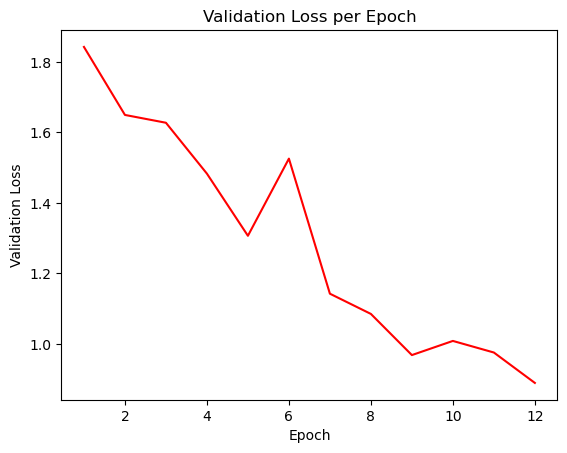

In [ ]:
val_loss_list_tensor = [float(x) for x in val_loss_list]
print(val_loss_list_tensor)

dic3 = {'Validation Loss':val_loss_list_tensor, 'Epoch':epoch_list}
df3 = pd.DataFrame(data=dic3)

p3 = sns.lineplot(data=df3, x='Epoch', y='Validation Loss', color='red')
p3.set_title('Validation Loss per Epoch')


plot_title = 'val_loss_per_epoch'

plot_filename = f"trials/{trial_name}/plots/{plot_title}.png"
os.makedirs(os.path.dirname(plot_filename), exist_ok=True)

p3.figure.savefig(plot_filename)

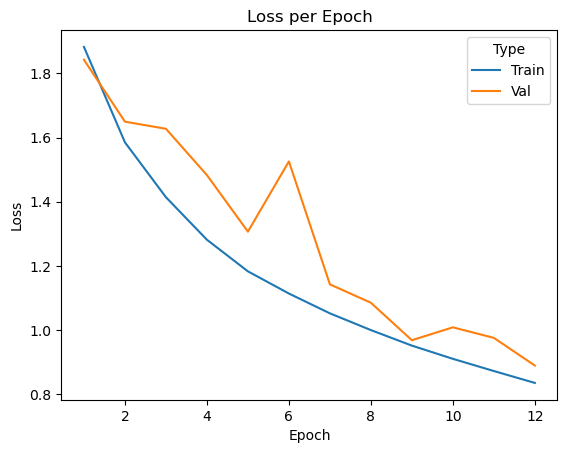

In [ ]:

val_loss_list_tensor = [float(x) for x in val_loss_list]

dic3 = {'Loss':val_loss_list_tensor, 'Epoch':epoch_list}
dic3_df = pd.DataFrame(data=dic3)
dic3_df['Type'] = 'Val'

dic = {'Loss':loss_list, 'epoch':epoch_list}
dic_df = pd.DataFrame(data=dic)
dic_df['Type'] = 'Train'

combined_df = pd.concat([dic_df,dic3_df])

p = sns.lineplot(data=combined_df, x='Epoch', y='Loss', hue='Type')
p.set_title('Loss per Epoch')


plot_title = 'loss_per_epoch'

plot_filename = f"trials/{trial_name}/plots/{plot_title}.png"
os.makedirs(os.path.dirname(plot_filename), exist_ok=True)

p.figure.savefig(plot_filename)


In [ ]:
test_single_image = False

if (test_single_image):
    data_iter = iter(testset)

    for i in range(40):
        (data, label) = next(data_iter)
    im = data
    data = data.unsqueeze(0)
    soft = nn.Softmax(dim=1)
    imshow(im)
    print(label)

    model_output = model(data)
    prediction = soft(model_output)

    _, ind = (torch.max(prediction, dim=1))
    print(ind)
    print("\n")

#from torchviz import make_dot, make_dot_from_trace
#make_dot(model_output.mean(), params=dict(model.named_parameters()))




In [ ]:

test_accuracy = calculate_accuracy(model, testloader, device)
kpi_filename = f"trials/{trial_name}/kpi.txt"
os.makedirs(os.path.dirname(kpi_filename), exist_ok=True)

with open(kpi_filename, "w") as f:
    f.write(f"Test Accuracy: {test_accuracy}")

print(test_accuracy)



0.7002


### Code to save Model

In [ ]:
#torch.save(model.state_dict(), "model_weights_130_epochs")